In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [16]:
def show_rgb(image):
    image_rgb = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

(1024, 1024, 3)


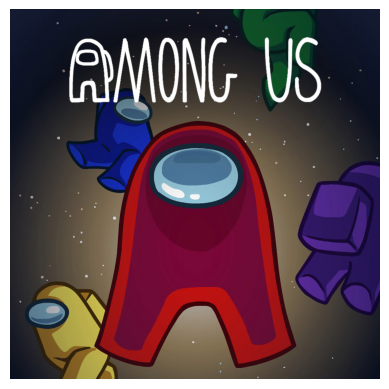

In [17]:
path=input("Please enter the path of the image: ")
image=cv2.imread(path)
print(image.shape)
show_rgb(image)


In [18]:
def calculate_target_size(image, kernel):
    if len(image.shape) == 2: 
        i_x, i_y = image.shape
        c = 1
    else: 
        i_x, i_y, c = image.shape
    k_x, k_y = kernel.shape
    t_x = i_x - k_x + 1
    t_y = i_y - k_y + 1    
    return t_x, t_y, c

In [19]:
def convolve(image,kernel):
    
    t_x,t_y,c=calculate_target_size(image,kernel)
    convolved_image=np.zeros([t_x,t_y,c])
    k=int(kernel.shape[0])
    for l in range(c):
        for i in range(t_x):
            for j in range(t_y):
                area_to_convolve=image[i:i+k,j:j+k,l]
                convolved_image[i,j,l]=np.sum(np.multiply(area_to_convolve,kernel))
    return convolved_image    

In [20]:
def sharpening_filter(image):
    kernel=np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image=convolve(image,kernel)
    return sharpened_image

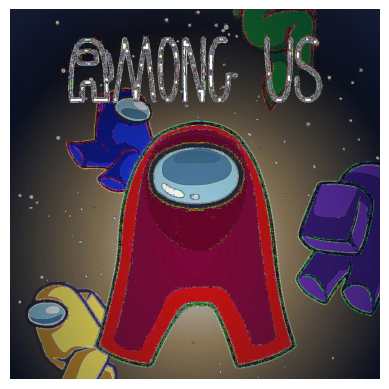

In [21]:
sharpened_image=sharpening_filter(image)
show_rgb(sharpened_image)

In [22]:
def blur_filter(image):
    kernel = np.ones((11,11),np.float32)/121
    result_img = convolve(image,kernel=kernel)
    return result_img

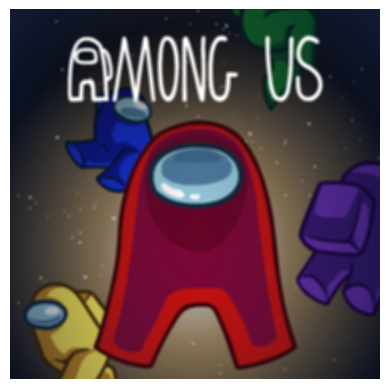

In [23]:
blurred_image=blur_filter(image)
show_rgb(blurred_image)

In [24]:
def convolve2(image, kernel):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    t_x, t_y, c = calculate_target_size(gray_image, kernel)
    convolved_image = np.zeros([t_x, t_y, c] if c > 1 else [t_x, t_y])

    k = int(kernel.shape[0] / 2)

    for x in range(k, gray_image.shape[0] - k):
        for y in range(k, gray_image.shape[1] - k):
            region = gray_image[x-k:x+k+1,y-k:y + k + 1]
            convolved_value = np.sum(region*kernel)
            if c > 1:
                convolved_image[x-k,y-k,:] = convolved_value
            else:
                convolved_image[x-k,y-k]= convolved_value

    return convolved_image


In [25]:
def sobel_filter(image):
    gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    kernel_horizontal=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    kernel_vertical=np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
    gradient_x=convolve2(gray_image,kernel_horizontal)
    gradient_y=convolve2(gray_image,kernel_vertical)
    G=np.hypot(gradient_x,gradient_y)
    theta=np.arctan2(gradient_y,gradient_x)
    return G,theta
    

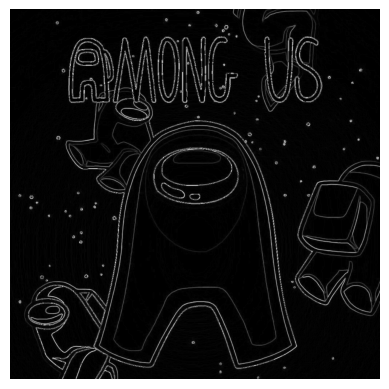

In [26]:
gradient_matrix, theta_matrix=sobel_filter(image)
show_rgb(gradient_matrix)

Text(0.5, 1.0, 'Edge Detection')

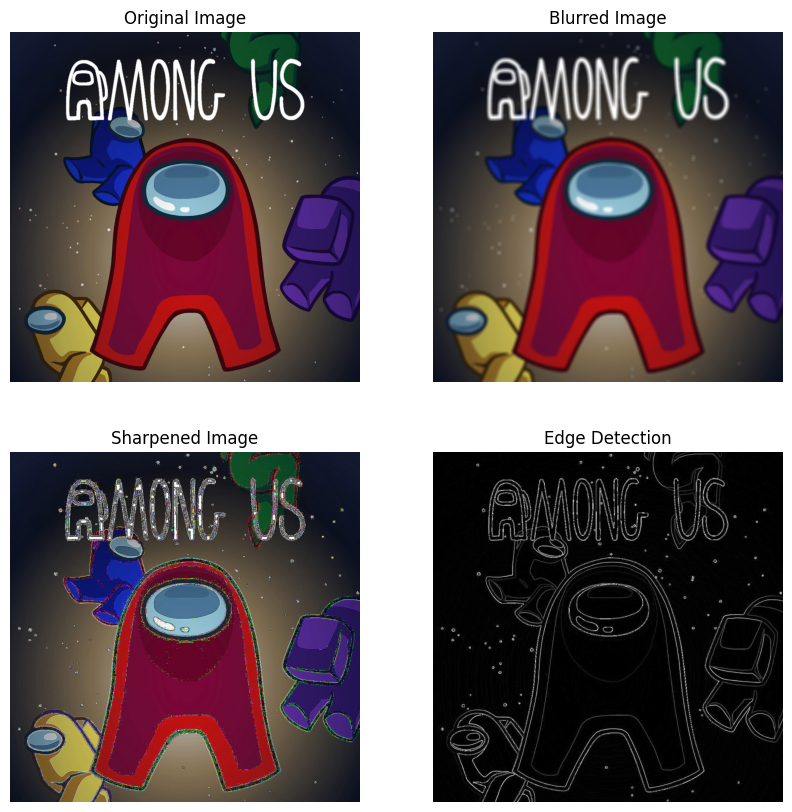

In [27]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
image_1=cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
image_2=cv2.cvtColor(sharpened_image.astype(np.uint8), cv2.COLOR_BGR2RGB)
image_3=cv2.cvtColor(blurred_image.astype(np.uint8), cv2.COLOR_BGR2RGB)
image_4=cv2.cvtColor(gradient_matrix.astype(np.uint8), cv2.COLOR_BGR2RGB)
axs[0,0].imshow(image_1)
axs[0,0].axis('off')
axs[0,0].set_title('Original Image')
axs[1,0].imshow(image_2)
axs[1,0].axis('off')
axs[1,0].set_title('Sharpened Image')
axs[0,1].imshow(image_3)
axs[0,1].axis('off')
axs[0,1].set_title('Blurred Image')
axs[1,1].imshow(image_4)
axs[1,1].axis('off')
axs[1,1].set_title('Edge Detection')
